# Transformer architecture


In this notebook, we aim to evaluate the performance of the Transformer architecture.

In [1]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# pytorch specific
import torch

from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import experiment, helpers



from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

## Grid

Here we define the parametters to search through

In [2]:
# We first set the parametters that we do no want to change

data_params = { 
    "LS_threshold" : 0.0023,
    "MAD_threshold" : 1, 
    "MT_removal" : True, 
    "expression_threshold" : 0.1}

model_params = {
    "dropout" : 0.2,
    "latent_dim" : 64,
    "variational" : False,
    "convolution": False,
    "transformer" : True
    }



In [3]:
importlib.reload(helpers)
dynamic_params = {
    "latent_dim": [16, 32, 64, 128],
    "attention_size": [16, 32, 64, 128],
    "num_layers" : [1,2,4,6]
}

configurations = helpers.generate_config(model_params, dynamic_params)


In [4]:
print(configurations[0])
print(len(configurations))

{'dropout': 0.2, 'latent_dim': 16, 'variational': False, 'convolution': False, 'transformer': True, 'attention_size': 3}
12


input shape : 1428


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:17<00:00,  1.73it/s]


Silhouette score for 5 clusters: 0.2706020772457123


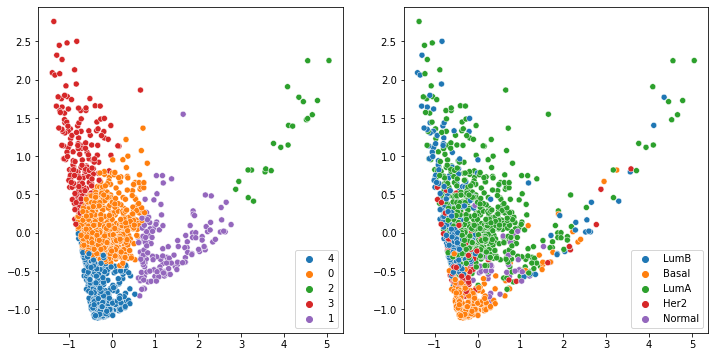

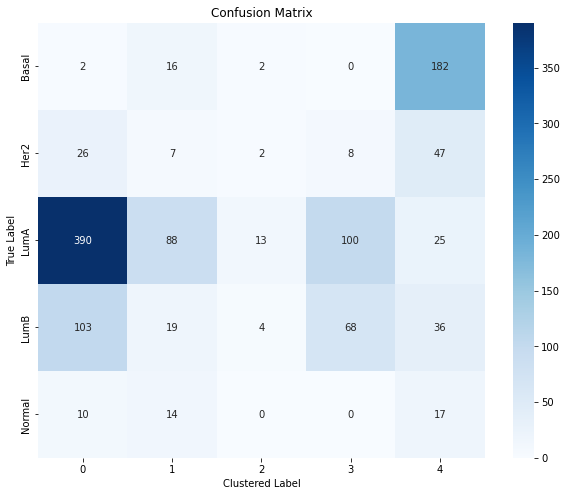

Adjusted Rand Index (ARI): 0.25
Normalized Mutual Information (NMI): 0.24
Fowlkes-Mallows Index: 0.49
Homogeneity: 0.25
Completeness: 0.24
V-measure: 0.24
Silhouette Score: 0.27
input shape : 1428


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:17<00:00,  1.70it/s]


Silhouette score for 5 clusters: 0.34641432762145996


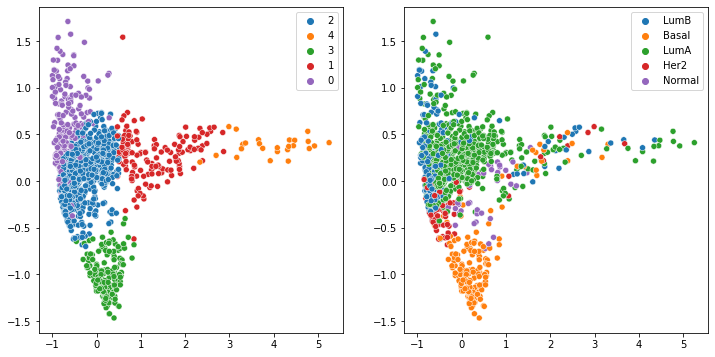

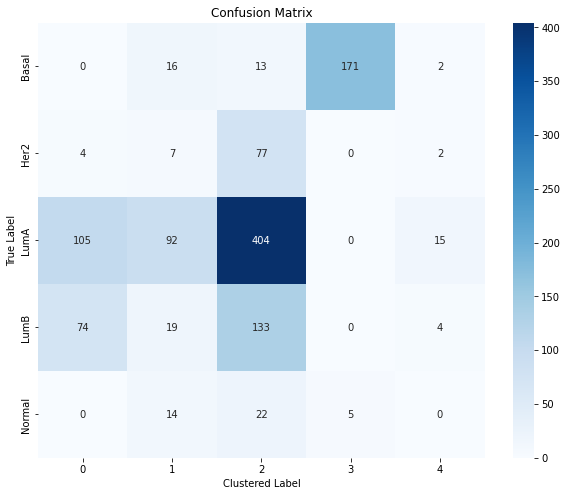

Adjusted Rand Index (ARI): 0.21
Normalized Mutual Information (NMI): 0.30
Fowlkes-Mallows Index: 0.49
Homogeneity: 0.30
Completeness: 0.31
V-measure: 0.30
Silhouette Score: 0.35
input shape : 1428


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(1231, 1428)
(1231, 1, 1428)
train data: 1231


100%|██████████| 30/30 [00:17<00:00,  1.72it/s]


Silhouette score for 5 clusters: 0.34455201029777527


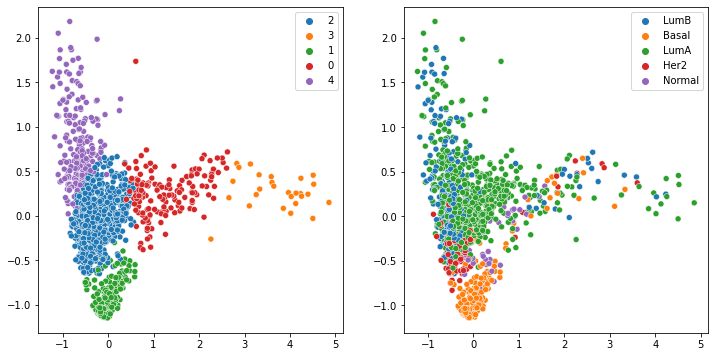

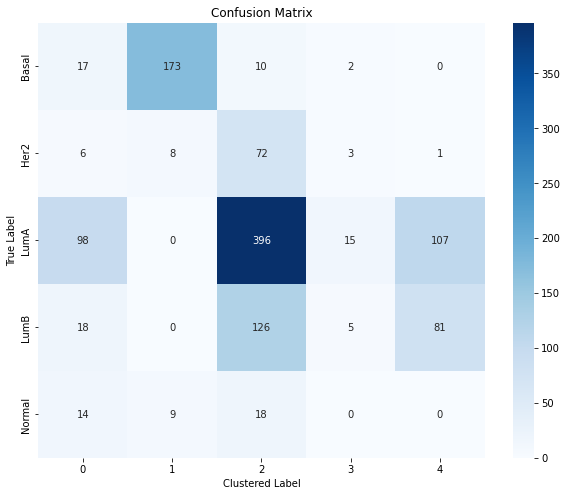

Adjusted Rand Index (ARI): 0.22
Normalized Mutual Information (NMI): 0.31
Fowlkes-Mallows Index: 0.49
Homogeneity: 0.30
Completeness: 0.31
V-measure: 0.31
Silhouette Score: 0.34


In [5]:
importlib.reload(experiment)
experiments = []

for config in configurations[:3]:
    e = experiment.Experiment(data_param=data_params, model_param=config, n_epoch= 30)
    e.run()

    experiment_data = {**config,'score': e.metric}
    experiments.append(experiment_data)




In [8]:
pd.DataFrame(experiments)

,dropout,latent_dim,variational,convolution,transformer,attention_size,num_heads,score
0,0.2,16,False,False,True,3,1428,0.245387
1,0.2,16,False,False,True,2,1428,0.206679
2,0.2,16,False,False,True,1,1428,0.218921


In [7]:
# Find the experiment with the highest score.
best_experiment = max(experiments, key=lambda exp: exp['score'])

# 'best_experiment' now holds the dictionary with the highest 'score' value.
best_config = best_experiment['config']
highest_score = best_experiment['score']

# You can print or otherwise use 'best_config' and 'highest_score' as needed.
print("Best configuration:", best_config)
print("Highest score:", highest_score)

Best configuration: {'dropout': 0.2, 'latent_dim': 16, 'variational': False, 'convolution': False, 'transformer': True, 'attention_size': 2, 'num_heads': 1428}
Highest score: 0.23506974571714276
